In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np
import imageio
from torch import nn
%matplotlib inline

In [59]:
x = torch.unsqueeze(torch.linspace(-3, 3, 100), dim=1) 
y = torch.sin(x)

In [60]:
def snake(x):
  a=3
  #return torch.sin(a*x)
  return  (1/a)*torch.pow(torch.sin(a*x), 2)
  #return 1/(1+torch.exp(-x))

def snake_grad(x):
  a=3
  #return a*torch.cos(a*x) 
  return 2* torch.sin(a*x)*torch.cos(a*x)
  #return sigmoid(x)*(1- sigmoid(x))

def neural_network(x,weights,bias):
    s_z = snake(torch.matmul(x,weights[0])+bias[0])
    return torch.matmul(s_z, weights[1]) + bias[1]

def dN_dx(weights, x):
    s_z_grad = snake_grad(torch.matmul(x,weights[0])+bias[0]) #100x10
    mul=torch.mul(weights[0].T,weights[1])
    return torch.matmul(s_z_grad,mul)

In [61]:
def error(pred,target): return ((pred-target)**2).mean() 

In [62]:
#initialize weights and biases
weights = [torch.randn((1,20),  requires_grad=True), torch.randn((20,1),  requires_grad=True)]
bias = [torch.randn(20,  requires_grad=True), torch.randn(1,  requires_grad=True)]

In [63]:
def training(x,epochs,lr):
  for i in range(epochs):

    pred = neural_network(x,weights,bias)
    loss = error(pred,y)
    loss.backward()
    weights[0].data -= lr*weights[0].grad.data
    weights[1].data -= lr*weights[1].grad.data
    bias[0].data -= lr*bias[0].grad.data
    bias[1].data -= lr*bias[1].grad.data

 
    weights[0].grad.zero_()
    weights[1].grad.zero_()
    bias[0].grad.zero_()
    bias[1].grad.zero_()

    print("Loss: ", loss.item())


In [64]:
 training(x,5000,0.01)

Loss:  7.200637340545654
Loss:  6.758741855621338
Loss:  6.3449506759643555
Loss:  5.958456039428711
Loss:  5.598080635070801
Loss:  5.262348175048828
Loss:  4.949708461761475
Loss:  4.658670425415039
Loss:  4.387819766998291
Loss:  4.135769367218018
Loss:  3.9011354446411133
Loss:  3.6825592517852783
Loss:  3.4787466526031494
Loss:  3.288511276245117
Loss:  3.1108007431030273
Loss:  2.944699764251709
Loss:  2.7894182205200195
Loss:  2.644266128540039
Loss:  2.508620500564575
Loss:  2.3819005489349365
Loss:  2.263543128967285
Loss:  2.152998685836792
Loss:  2.0497264862060547
Loss:  1.9532058238983154
Loss:  1.862938404083252
Loss:  1.7784576416015625
Loss:  1.6993321180343628
Loss:  1.6251660585403442
Loss:  1.555597186088562
Loss:  1.4902958869934082
Loss:  1.4289610385894775
Loss:  1.371317744255066
Loss:  1.317113995552063
Loss:  1.2661184072494507
Loss:  1.2181174755096436
Loss:  1.172914981842041
Loss:  1.1303285360336304
Loss:  1.0901896953582764
Loss:  1.052342414855957
Loss:  

In [65]:
N=neural_network(x,weights,bias)
error(N,y)

tensor(0.0040, grad_fn=<MeanBackward0>)

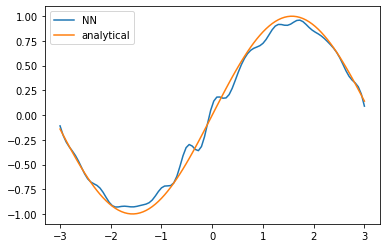

In [66]:
plt.plot(x.data.numpy(), N.data.numpy(), label='NN')
plt.plot(x,y, label='analytical')
plt.legend()

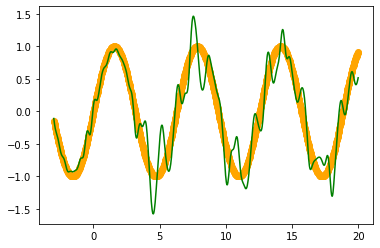

In [67]:
#predictions
x = torch.unsqueeze(torch.linspace(-3, 20, 800), dim=1) 
y = torch.sin(x)
N = neural_network(x, weights,bias)
fig, ax = plt.subplots()
ax.scatter(x.data.numpy(),y.data.numpy(), color = "orange")
ax.plot(x.data.numpy(), N.data.numpy(), 'g-', label ='prediction in T')

In [ ]:
#second approach , net1 trained out of T

In [79]:
net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 40),
        torch.nn.Sigmoid(),
        torch.nn.Linear(40, 1),
    )

In [80]:
def loss(x):

    x.requires_grad = True
    N = neural_network(x, weights, bias)
    dNx_dx = dN_dx(weights, x)

    return  torch.mean( ( dNx_dx - net1(x)*N )  ** 2)

In [81]:
optimizer = torch.optim.Adam(net1.parameters(), lr=0.01)

In [82]:
x = torch.unsqueeze(torch.linspace(-3,8, 200), dim=1)  #train net1 in (-4, 4)

In [100]:
def closure():
    
    l = loss(x)
    #losses.append(l)
    
    optimizer.zero_grad()
    l.backward()
    print(f"loss: {l}")
    return l

for i in range(5000):
    optimizer.step(closure)

loss: 0.0788634791970253
loss: 0.0789237916469574
loss: 0.07901237905025482
loss: 0.0791398212313652
loss: 0.07931052893400192
loss: 0.07952173054218292
loss: 0.07973592728376389
loss: 0.079888254404068
loss: 0.07987309247255325
loss: 0.07964535057544708
loss: 0.07925962656736374
loss: 0.07890244573354721
loss: 0.07874193787574768
loss: 0.07881440222263336
loss: 0.0790124386548996
loss: 0.07917161285877228
loss: 0.07917939871549606
loss: 0.07903385907411575
loss: 0.07884593307971954
loss: 0.0787409245967865
loss: 0.07876627147197723
loss: 0.0788673609495163
loss: 0.07894594967365265
loss: 0.07893906533718109
loss: 0.0788571909070015
loss: 0.07876775413751602
loss: 0.07873228937387466
loss: 0.07876129448413849
loss: 0.07881437987089157
loss: 0.07884152233600616
loss: 0.07882214337587357
loss: 0.0787748470902443
loss: 0.07873677462339401
loss: 0.07873113453388214
loss: 0.07875289767980576
loss: 0.07877711951732635
loss: 0.07878252118825912
loss: 0.07876605540513992
loss: 0.07874172925949

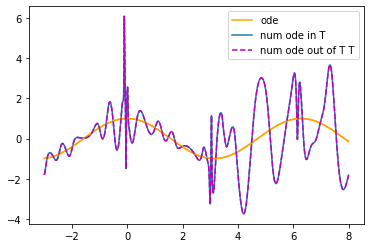

In [101]:
#check if cos is the same with O.D.E
x = torch.unsqueeze(torch.linspace(-3,8, 2000), dim=1) 
dy = torch.cos(x)

method_dy = net1(x)* neural_network(x,weights,bias)
method_dy = method_dy.detach().numpy()
plt.plot(x.data.numpy(), dy.data.numpy(),'orange', label='ode')
plt.plot(x.data.numpy(), method_dy, label='num ode in T')

#x = torch.unsqueeze(torch.linspace(-3,3, 2000), dim=1) 
dy = torch.cos(x)

method_dy = net1(x)* neural_network(x,weights,bias) 
method_dy = method_dy.detach().numpy()
plt.plot(x.data.numpy(), dy.data.numpy(), 'orange')
plt.plot(x.data.numpy(), method_dy, 'm--', label='num ode out of T T')

plt.legend()
plt.show()

In [35]:
#solution

In [102]:
x = torch.Tensor(np.linspace(-3, 3, 300)[:, None]) 

In [103]:
NN = nn.Sequential(nn.Linear(1, 150), nn.Sigmoid(), nn.Linear(150,1))
A = neural_network(x[0],weights,bias)
Psi_t = lambda x: A + (x+3)*NN(x) #NN is responsible for the solution of O.D.E
f = lambda x: net1(x)*neural_network(x,weights,bias) #they are both trained. 

In [104]:
def loss_fun(x):

    x.requires_grad = True
    outputs = Psi_t(x)
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                        create_graph=True)[0]

    return  torch.mean( ( Psi_t_x - f(x) )  ** 2)

In [109]:
optimizer = torch.optim.Adam(NN.parameters(), lr=0.1)

In [111]:
def closure():

    optimizer.zero_grad()
    l = loss_fun(x)
    print(l)
    #l.backward()
    l.backward(retain_graph=True)
    return l

for i in range(5000):
    optimizer.step(closure)

tensor(0.1066, grad_fn=<MeanBackward0>)
tensor(0.1066, grad_fn=<MeanBackward0>)
tensor(0.1065, grad_fn=<MeanBackward0>)
tensor(0.1065, grad_fn=<MeanBackward0>)
tensor(0.1065, grad_fn=<MeanBackward0>)
tensor(0.1065, grad_fn=<MeanBackward0>)
tensor(0.1065, grad_fn=<MeanBackward0>)
tensor(0.1065, grad_fn=<MeanBackward0>)
tensor(0.1065, grad_fn=<MeanBackward0>)
tensor(0.1065, grad_fn=<MeanBackward0>)
tensor(0.1065, grad_fn=<MeanBackward0>)
tensor(0.1065, grad_fn=<MeanBackward0>)
tensor(0.1065, grad_fn=<MeanBackward0>)
tensor(0.1065, grad_fn=<MeanBackward0>)
tensor(0.1065, grad_fn=<MeanBackward0>)
tensor(0.1065, grad_fn=<MeanBackward0>)
tensor(0.1065, grad_fn=<MeanBackward0>)
tensor(0.1065, grad_fn=<MeanBackward0>)
tensor(0.1065, grad_fn=<MeanBackward0>)
tensor(0.1064, grad_fn=<MeanBackward0>)
tensor(0.1064, grad_fn=<MeanBackward0>)
tensor(0.1064, grad_fn=<MeanBackward0>)
tensor(0.1064, grad_fn=<MeanBackward0>)
tensor(0.1064, grad_fn=<MeanBackward0>)
tensor(0.1064, grad_fn=<MeanBackward0>)


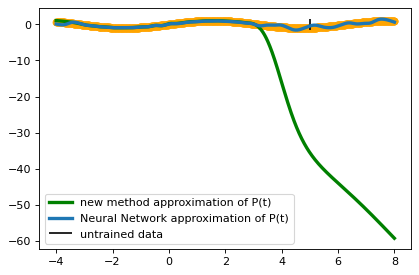

In [114]:
x = torch.unsqueeze(torch.linspace(-4,8, 800), dim=1) 
y = torch.sin(x)  
p_t_second = Psi_t(x)
p_t_first = neural_network(x,weights,bias)
fig, ax = plt.subplots(dpi=80)
ax.scatter(x.data.numpy(),y.data.numpy(), color = "orange")
ax.plot(x.data.numpy(), p_t_second.data.numpy(), 'g-', lw=3, label ='new method approximation of P(t)')
ax.plot(x.data.numpy(), p_t_first.data.numpy(), lw=3, label ='Neural Network approximation of P(t)')

ax.vlines(x=5, ymin=-1.5, ymax=1.6, color='black', label='untrained data')


#ax.plot(x.data.numpy(), yrk, lw=3, label ='RK approximation of P(t)')

plt.legend(loc='best');

In [115]:
#RK method
x = torch.unsqueeze(torch.linspace(-5,8, 800), dim=1) 
N = len(x)
h = (8+5)/N

In [116]:
y = torch.sin(x)

In [117]:
yrk = np.zeros(int(N))
yrk[0]=neural_network(x[0],weights,bias)
for i in range(0,int(N-1)):
    k1 = net1(x[i])*neural_network(x[i],weights,bias)
    k2 = net1(x[i]+(h/2))*neural_network(x[i]+(h/2), weights,bias)
    k3 = net1(x[i]+(h/2))*neural_network(x[i]+(h/2), weights,bias)
    k4 = net1(x[i]+h)*neural_network(x[i]+h, weights,bias)

    yrk[i+1] = yrk[i] + (1/6)*h*(k1+2*k2+2*k3+k4)

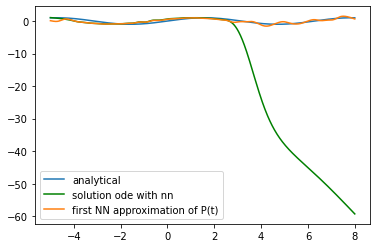

In [118]:
#plt.plot(x,yrk, label ='rk', color ='r')
plt.plot(x,y, label ='analytical')
plt.plot(x.data.numpy(), p_t_second.data.numpy(), 'g-', label ='solution ode with nn')
plt.plot(x.data.numpy(), p_t_first.data.numpy(), label ='first NN approximation of P(t)')



plt.legend()
plt.show()